In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import os
from analysis_functions import Analysis

# 1) Analysis of the gradients

In [2]:
# Let's start by loading the data of the agents traines with continuous encoding
path_skolik_baseline_lskolik = "../../results/continuous/skolik_arch/baseline/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper"
path_skolik_basic_lskolik = "../../results/continuous/skolik_arch/basic_datareup/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper"
path_skolik_schuld_datareup_lskolik = "../../results/continuous/skolik_arch/schuld_datareup/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper"

analysis_baseline = Analysis(path_skolik_baseline_lskolik)
analysis_basic = Analysis(path_skolik_basic_lskolik)
analysis_schuld = Analysis(path_skolik_schuld_datareup_lskolik)

In [3]:
moving_average_baseline = analysis_baseline.get_moving_average(25)
moving_average_basic = analysis_basic.get_moving_average(25)
moving_average_schuld = analysis_schuld.get_moving_average(25)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


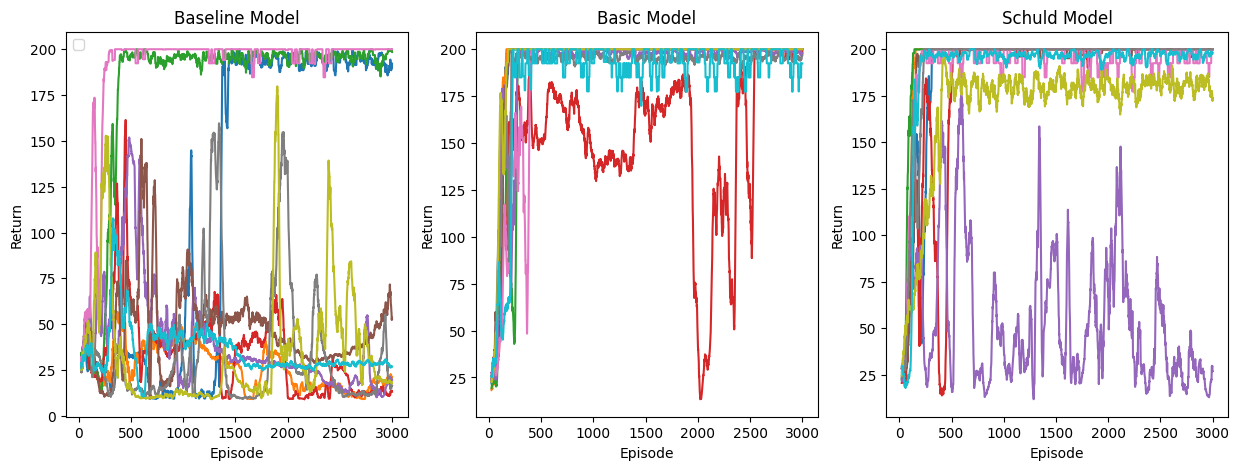

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(analysis_baseline.number_of_agents):
    axs[0].plot(moving_average_baseline[i])
    axs[1].plot(moving_average_basic[i])
    axs[2].plot(moving_average_schuld[i])

axs[0].set_title("Baseline Model")
axs[1].set_title("Basic Model")
axs[2].set_title("Schuld Model")
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Return")
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Return")
axs[2].set_xlabel("Episode")
axs[2].set_ylabel("Return")
axs[0].legend()

In [5]:
baseline_mean, baseline_variance = analysis_baseline.get_gradients_all_params()
basic_mean, basic_variance = analysis_basic.get_gradients_all_params()
schuld_mean, schuld_variance = analysis_schuld.get_gradients_all_params()

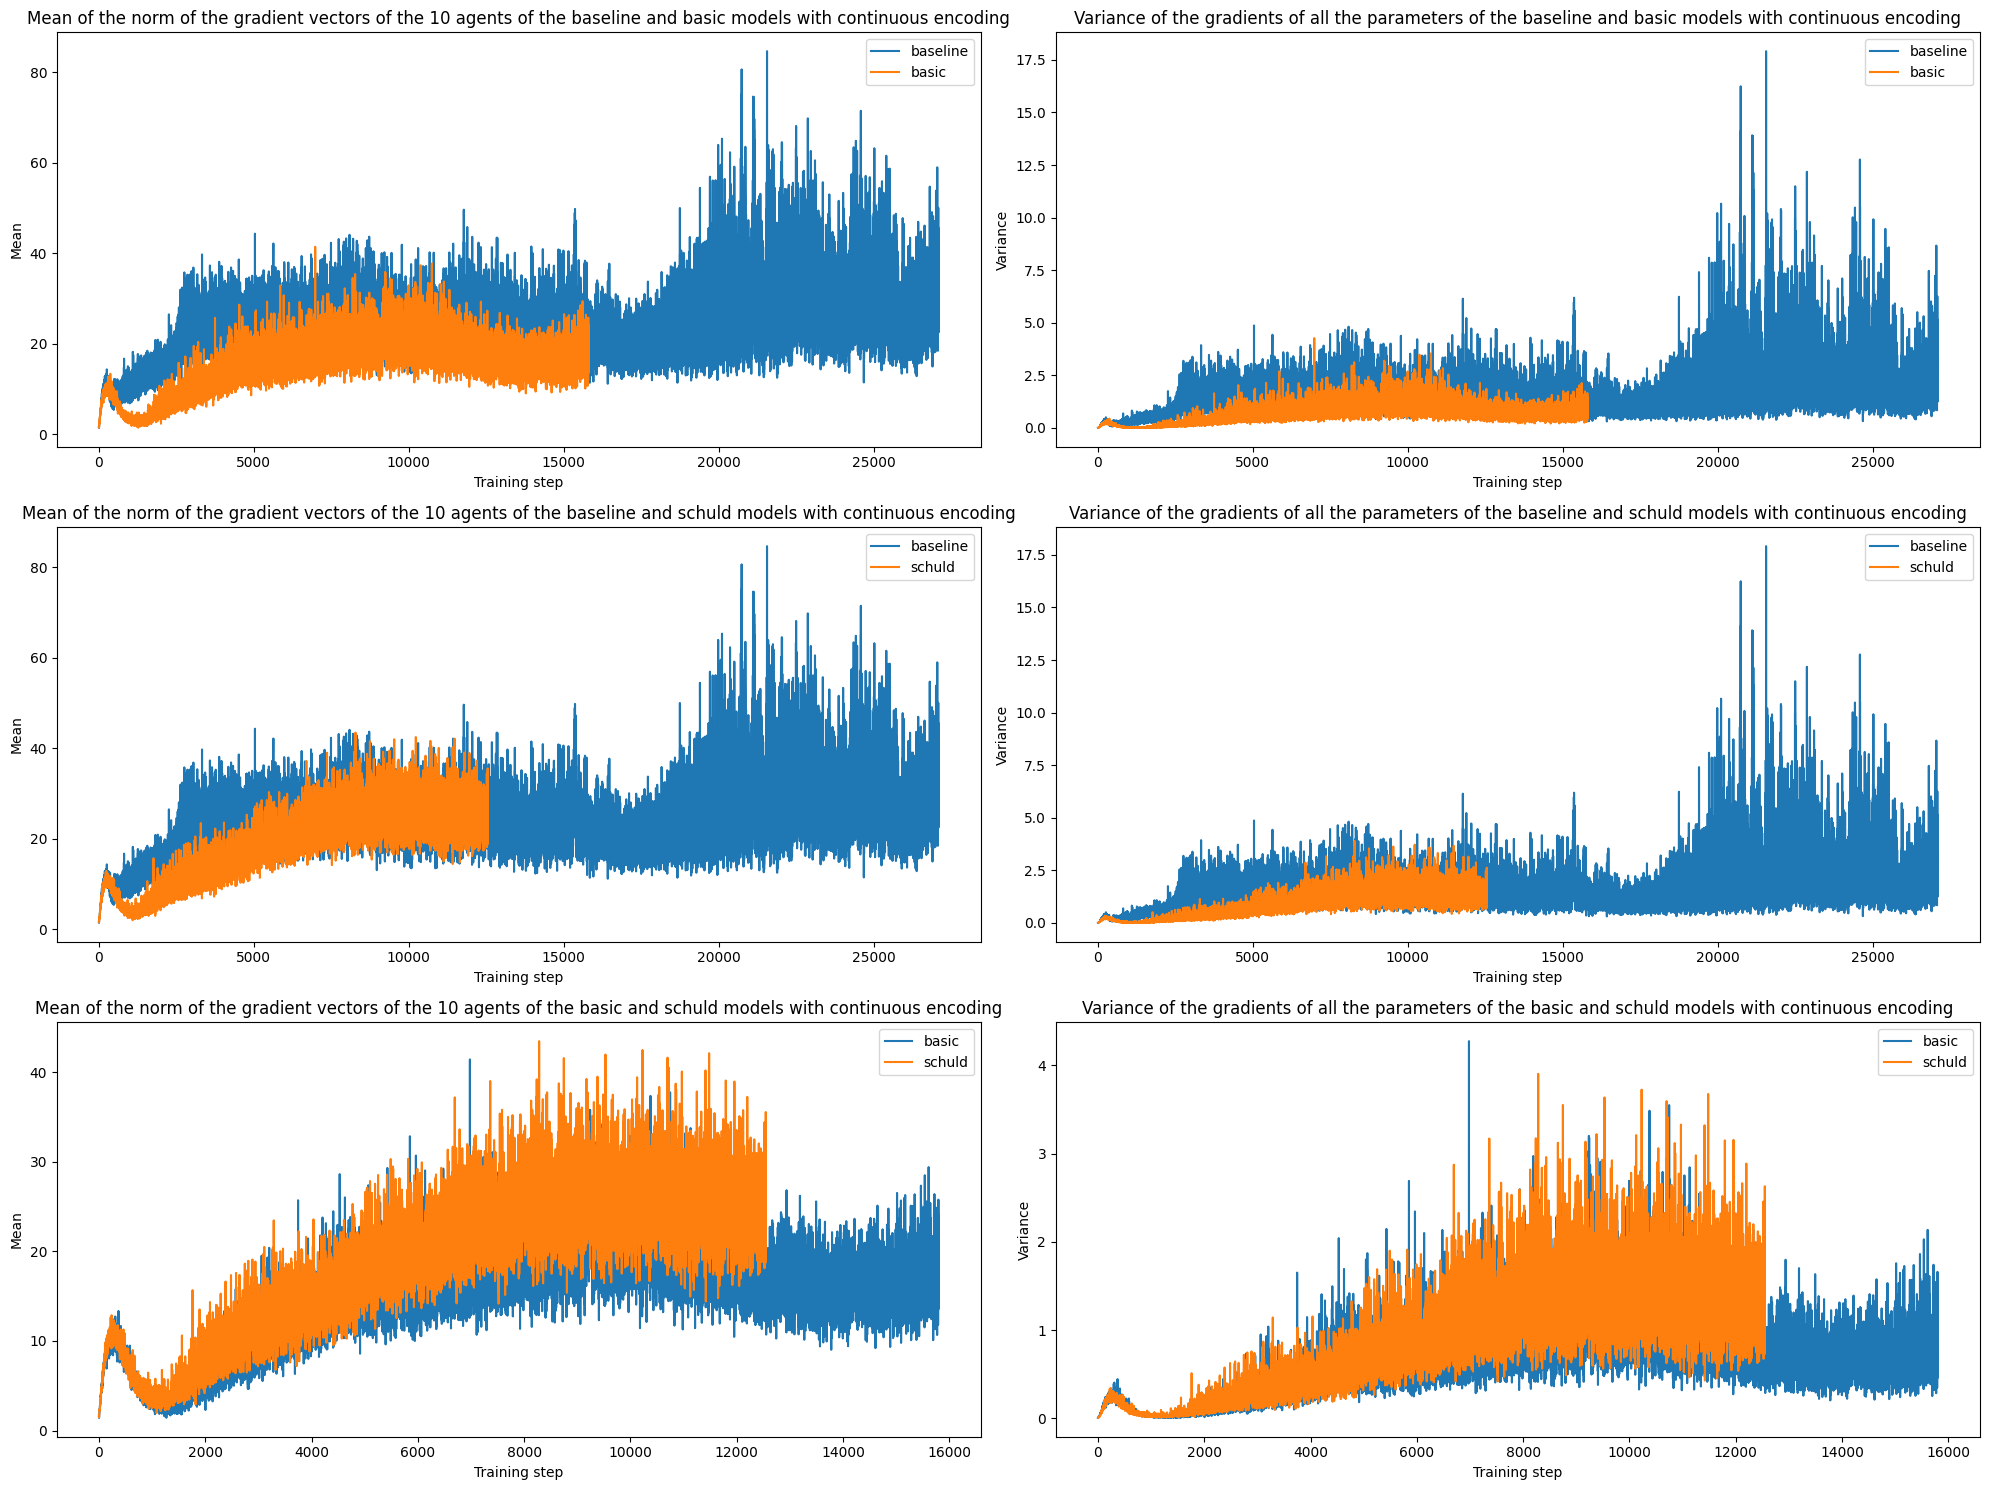

In [6]:
fig, axs = plt.subplots(3,2, tight_layout=True, figsize=(20, 15))

axs[0,0].set_title("Mean of the norm of the gradient vectors of the 10 agents of the baseline and basic models with continuous encoding")
axs[0,0].set_xlabel("Training step")
axs[0,0].set_ylabel("Mean")
axs[0,0].plot(baseline_mean, label = "baseline")
axs[0,0].plot(basic_mean, label = "basic")
axs[0,0].legend()

axs[0,1].set_title("Variance of the gradients of all the parameters of the baseline and basic models with continuous encoding")
axs[0,1].set_xlabel("Training step")
axs[0,1].set_ylabel("Variance")
axs[0,1].plot(baseline_variance, label = "baseline")
axs[0,1].plot(basic_variance, label = "basic")
axs[0,1].legend()




axs[1,0].set_title("Mean of the norm of the gradient vectors of the 10 agents of the baseline and schuld models with continuous encoding")
axs[1,0].set_xlabel("Training step")
axs[1,0].set_ylabel("Mean")
axs[1,0].plot(baseline_mean, label = "baseline")
axs[1,0].plot(schuld_mean, label = "schuld")
axs[1,0].legend()

axs[1,1].set_title("Variance of the gradients of all the parameters of the baseline and schuld models with continuous encoding")
axs[1,1].set_xlabel("Training step")
axs[1,1].set_ylabel("Variance")
axs[1,1].plot(baseline_variance, label = "baseline")
axs[1,1].plot(schuld_variance, label = "schuld")
axs[1,1].legend()




axs[2,0].set_title("Mean of the norm of the gradient vectors of the 10 agents of the basic and schuld models with continuous encoding")
axs[2,0].set_xlabel("Training step")
axs[2,0].set_ylabel("Mean")
axs[2,0].plot(basic_mean, label = "basic")
axs[2,0].plot(schuld_mean, label = "schuld")
axs[2,0].legend()

axs[2,1].set_title("Variance of the gradients of all the parameters of the basic and schuld models with continuous encoding")
axs[2,1].set_xlabel("Training step")
axs[2,1].set_ylabel("Variance")
axs[2,1].plot(basic_variance, label = "basic")
axs[2,1].plot(schuld_variance, label = "schuld")
axs[2,1].legend()

plt.show()

# 2) Analysis of the agents without output scaling

In [7]:
path_skolik_baseline_lskolik_no_outscaling = "../../results/continuous/skolik_arch/baseline/no_outscaling/ZZ_obs/skolik_optimal_hyper"
path_skolik_basic_lskolik_no_outscaling = "../../results/continuous/skolik_arch/basic_datareup/no_outscaling/ZZ_obs/skolik_optimal_hyper"
path_skolik_schuld_datareup_lskolik_no_outscaling = "../../results/continuous/skolik_arch/schuld_datareup/no_outscaling/ZZ_obs/skolik_optimal_hyper"

analysis_baseline_no_outscaling = Analysis(path_skolik_baseline_lskolik_no_outscaling)
analysis_basic_no_outscaling = Analysis(path_skolik_basic_lskolik_no_outscaling)
analysis_schuld_no_outscaling = Analysis(path_skolik_schuld_datareup_lskolik_no_outscaling)

In [8]:
moving_average_baseline_no_outscaling = analysis_baseline_no_outscaling.get_moving_average(25)
moving_average_basic_no_outscaling = analysis_basic_no_outscaling.get_moving_average(25)
moving_average_schuld_no_outscaling = analysis_schuld_no_outscaling.get_moving_average(25)

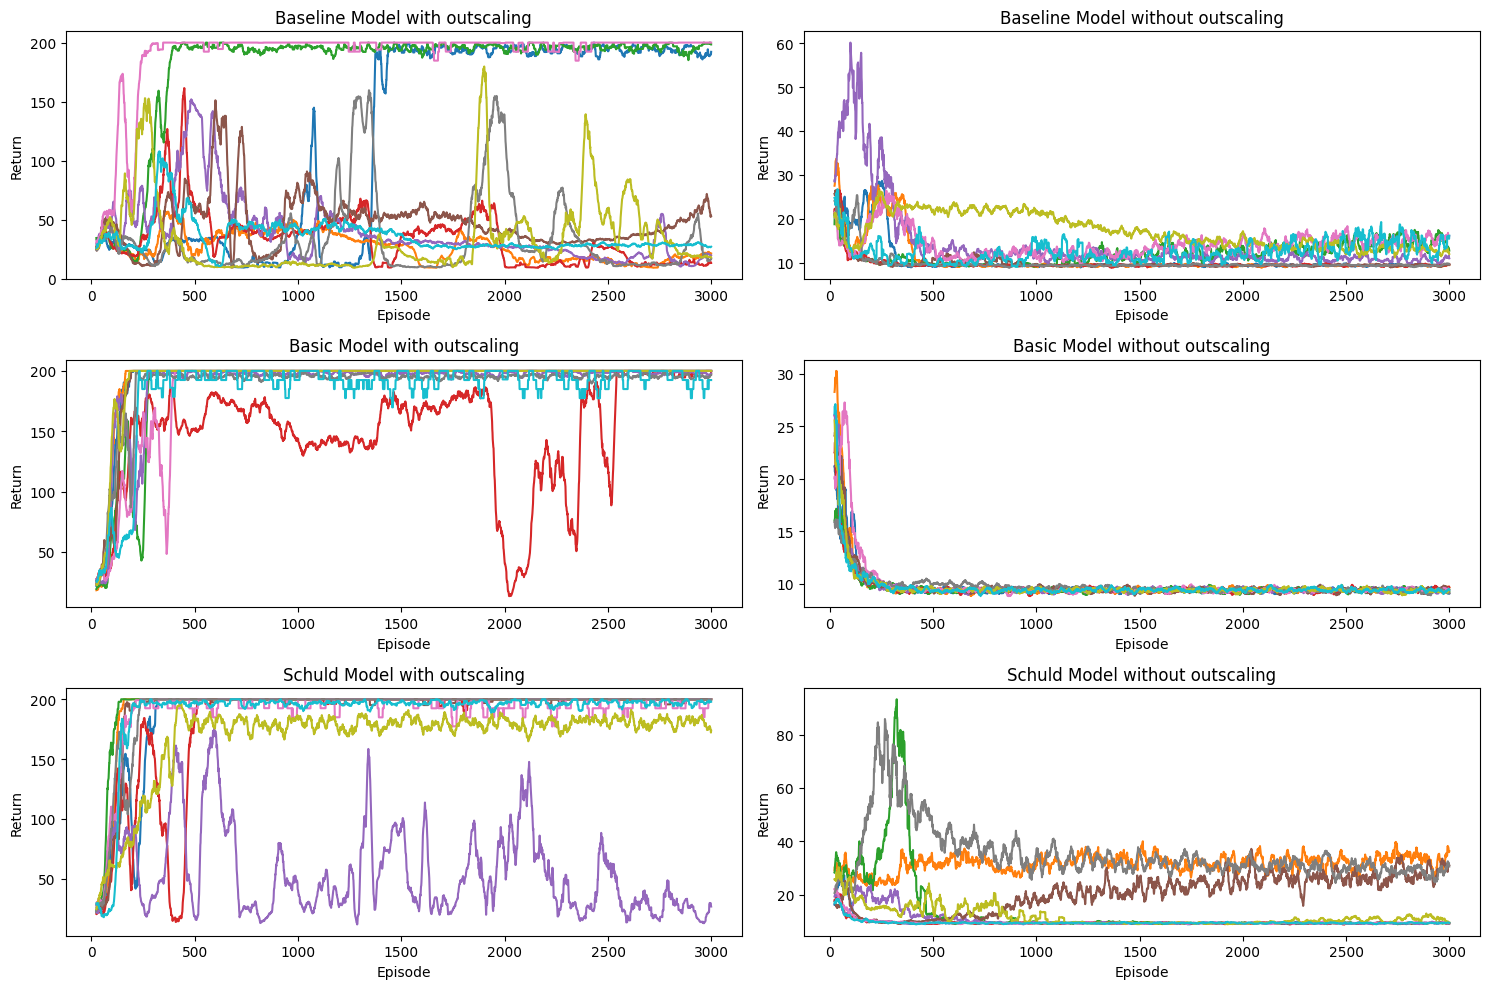

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10), tight_layout=True)

for i in range(analysis_baseline.number_of_agents):
    axs[0,0].plot(moving_average_baseline[i])
    axs[0,1].plot(moving_average_baseline_no_outscaling[i])
    axs[1,0].plot(moving_average_basic[i])
    axs[1,1].plot(moving_average_basic_no_outscaling[i])
    axs[2,0].plot(moving_average_schuld[i])
    axs[2,1].plot(moving_average_schuld_no_outscaling[i])

axs[0,0].set_title("Baseline Model with outscaling")
axs[0,1].set_title("Baseline Model without outscaling")
axs[1,0].set_title("Basic Model with outscaling")
axs[1,1].set_title("Basic Model without outscaling")
axs[2,0].set_title("Schuld Model with outscaling")
axs[2,1].set_title("Schuld Model without outscaling")

axs[0,0].set_xlabel("Episode")
axs[0,0].set_ylabel("Return")
axs[0,1].set_xlabel("Episode")
axs[0,1].set_ylabel("Return")
axs[1,0].set_xlabel("Episode")
axs[1,0].set_ylabel("Return")
axs[1,1].set_xlabel("Episode")
axs[1,1].set_ylabel("Return")
axs[2,0].set_xlabel("Episode")
axs[2,0].set_ylabel("Return")
axs[2,1].set_xlabel("Episode")
axs[2,1].set_ylabel("Return")

plt.show()